In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets import load_breast_cancer
#from sklearn.metrics import confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#import seaborn as sns
#sns.set()

In [57]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv("iris.csv")

In [58]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [61]:
x = data.drop("species",axis = 1)
y = data["species"]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [66]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
116,6.5,3.0,5.5,1.8
22,4.6,3.6,1.0,0.2
135,7.7,3.0,6.1,2.3
130,7.4,2.8,6.1,1.9
90,5.5,2.6,4.4,1.2
...,...,...,...,...
72,6.3,2.5,4.9,1.5
103,6.3,2.9,5.6,1.8
49,5.0,3.3,1.4,0.2
133,6.3,2.8,5.1,1.5


In [68]:
l = LabelEncoder()
y_train = l.fit_transform(y_train)

#X_train = l.fit_transform(X_train)
y_test = l.transform(y_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
y_pred = classifier.predict(x_test)

In [71]:
y_pred

array([1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 1, 0, 2])

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        12
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [73]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

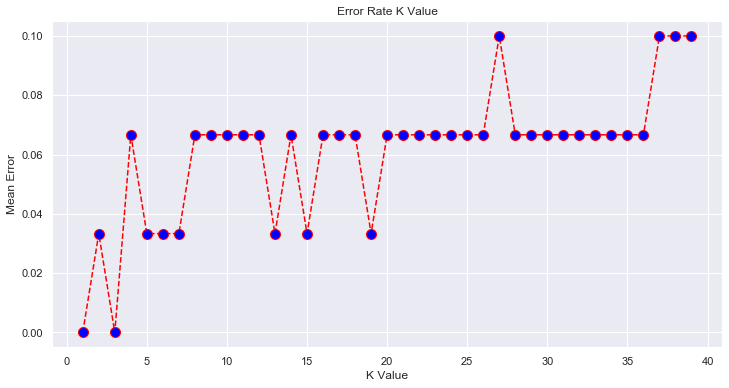

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')